In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency, f_oneway

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

# models for classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

Loading the Data

In [35]:
df = pd.read_csv('/home/shigilsasi/code/Guvi_Projects/NutriClass_Food_Classfication_Using_Nutritional_Data/synthetic_food_dataset_imbalanced.csv')
df.head()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False,Pizza
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True,Ice Cream
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False,Burger
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True,Sushi
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False,Donut


Data Inspect

In [36]:
df.shape

(31700, 16)

In [37]:
df.describe()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size
count,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000
mean,273.378441,9.523802,12.476848,28.943200,8.543813,1.904044,335.387611,26.865167,64.213509,48.976592,150.731940
std,111.457160,8.024212,8.425834,12.668795,7.989075,1.779542,319.066106,24.965067,25.390239,20.738749,51.796599
min,60.786204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.465039,58.575705
25%,210.301731,3.858307,8.245636,25.098800,3.739656,0.741204,63.000654,12.701920,59.984731,38.994221,109.511113
50%,281.774249,9.091637,11.574161,29.681430,5.500479,1.646608,292.525242,23.285882,68.436204,45.613748,151.706514
75%,329.821946,12.683957,15.818611,34.635789,14.426303,2.668750,631.367901,35.132214,75.464697,52.399496,189.083806
max,1289.956763,81.761772,88.619611,140.585537,78.548162,18.891993,2724.236846,260.149443,286.126400,251.837472,554.719629


In [38]:
df.describe(include='object')   

,Meal_Type,Preparation_Method,Food_Name
count,31700,31700,31700
unique,4,4,10
top,snack,baked,Pizza
freq,8001,8048,6000


In [39]:
df.dtypes

Calories              float64
Protein               float64
Fat                   float64
Carbs                 float64
Sugar                 float64
Fiber                 float64
Sodium                float64
Cholesterol           float64
Glycemic_Index        float64
Water_Content         float64
Serving_Size          float64
Meal_Type              object
Preparation_Method     object
Is_Vegan                 bool
Is_Gluten_Free           bool
Food_Name              object
dtype: object

Data Cleaning

In [40]:
df.duplicated().sum()

np.int64(313)

In [41]:
df.drop_duplicates(inplace=True)
df.shape    

(31387, 16)

In [42]:
df.isnull().sum()

Calories              127
Protein               127
Fat                   127
Carbs                 127
Sugar                 127
Fiber                 127
Sodium                127
Cholesterol           127
Glycemic_Index        127
Water_Content         127
Serving_Size          127
Meal_Type               0
Preparation_Method      0
Is_Vegan                0
Is_Gluten_Free          0
Food_Name               0
dtype: int64

In [43]:
nutri_cols = ['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium', 'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size']

df[nutri_cols].skew().sort_values(ascending=False)

Water_Content     4.153561
Cholesterol       3.652109
Fiber             3.615291
Protein           3.099263
Sugar             2.815007
Fat               2.811533
Calories          2.459839
Sodium            1.532606
Carbs             1.527461
Serving_Size      1.323778
Glycemic_Index    1.051471
dtype: float64

In [44]:
for col in nutri_cols:
    df[col].fillna(df[col].median(), inplace=True)

/tmp/ipykernel_37207/2994321312.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipykernel_37207/2994321312.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [45]:
df.isnull().sum()

Calories              0
Protein               0
Fat                   0
Carbs                 0
Sugar                 0
Fiber                 0
Sodium                0
Cholesterol           0
Glycemic_Index        0
Water_Content         0
Serving_Size          0
Meal_Type             0
Preparation_Method    0
Is_Vegan              0
Is_Gluten_Free        0
Food_Name             0
dtype: int64

In [46]:
df['Meal_Type'].value_counts()

Meal_Type
snack        7923
breakfast    7874
dinner       7799
lunch        7791
Name: count, dtype: int64

In [47]:
df['Preparation_Method'].value_counts()

Preparation_Method
baked      7970
raw        7868
grilled    7868
fried      7681
Name: count, dtype: int64

In [48]:
df['Is_Vegan'].value_counts()

Is_Vegan
False    27717
True      3670
Name: count, dtype: int64

In [49]:
df['Is_Gluten_Free'].value_counts()

Is_Gluten_Free
False    19295
True     12092
Name: count, dtype: int64

In [50]:
df['Food_Name'].value_counts()

Food_Name
Pizza        5916
Burger       4938
Donut        4466
Pasta        3975
Sushi        3462
Ice Cream    2968
Steak        1992
Apple        1484
Banana       1193
Salad         993
Name: count, dtype: int64

In [51]:
X = df.drop('Food_Name', axis=1)
y = df['Food_Name']

In [52]:
df.columns

Index(['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium',
       'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size',
       'Meal_Type', 'Preparation_Method', 'Is_Vegan', 'Is_Gluten_Free',
       'Food_Name'],
      dtype='object')

EDA for Feature Selection

In [53]:
cat_cols = ['Meal_Type', 'Preparation_Method', 'Is_Vegan', 'Is_Gluten_Free']

num_cont_cols = ['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium',
       'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size']

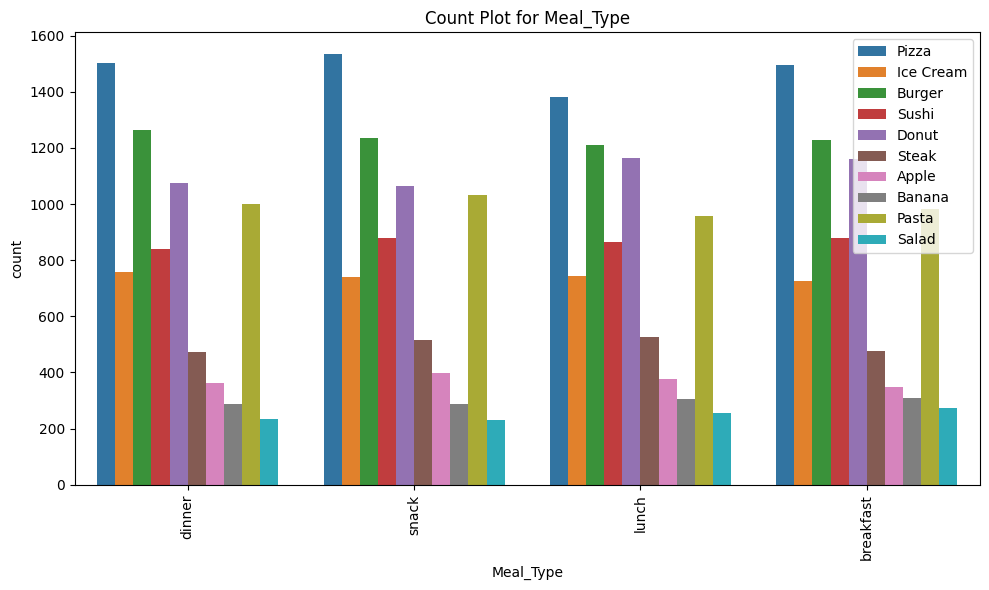

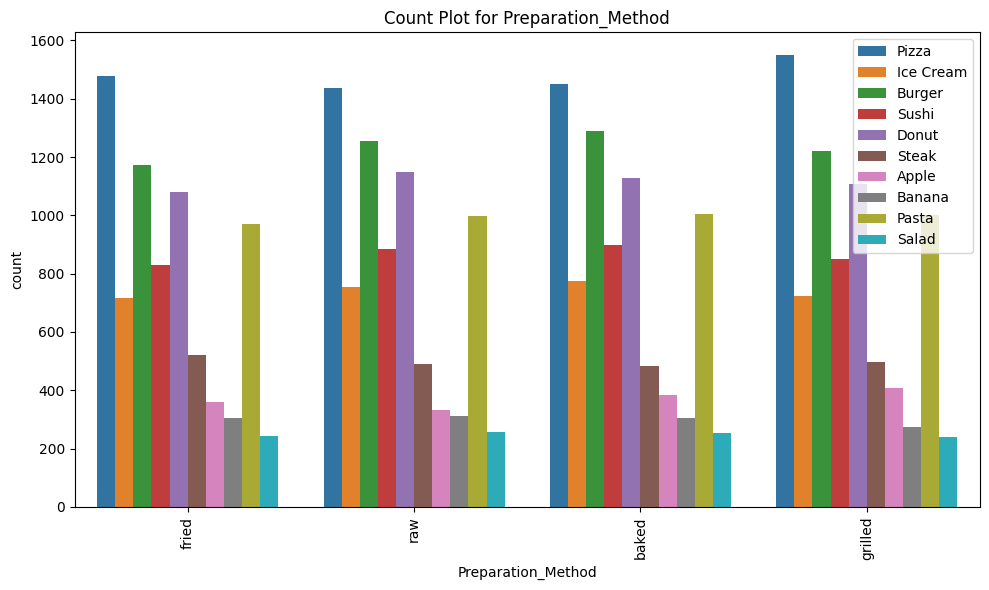

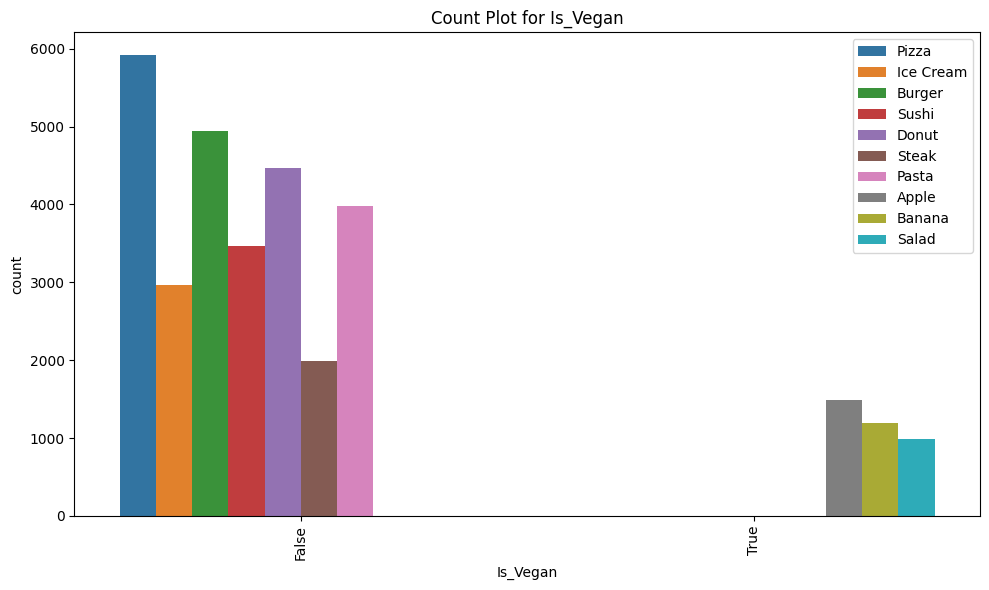

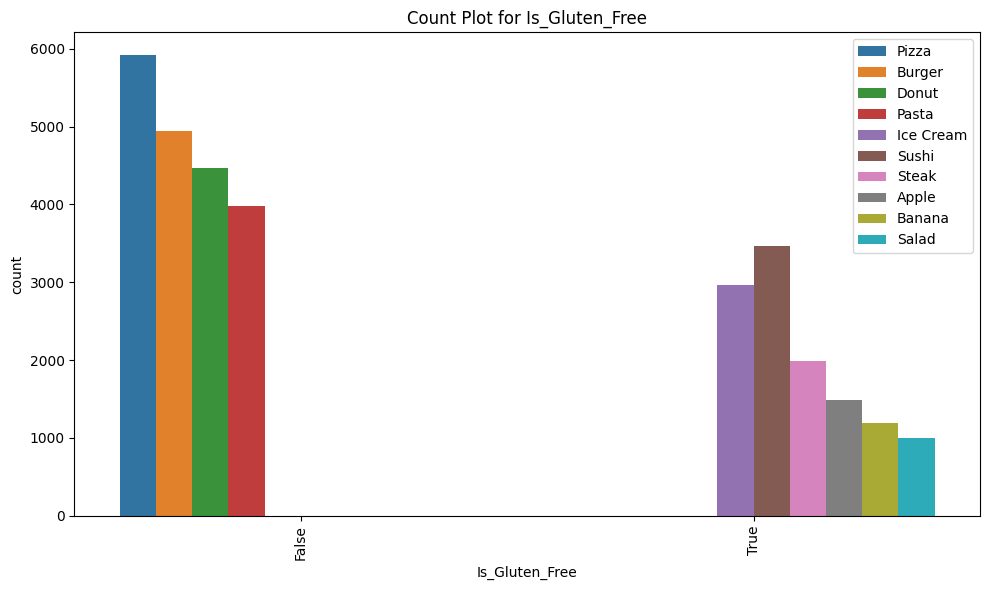

In [54]:
# Categorical columns bar chart
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='Food_Name')
    plt.title("Count Plot for " + col)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show()



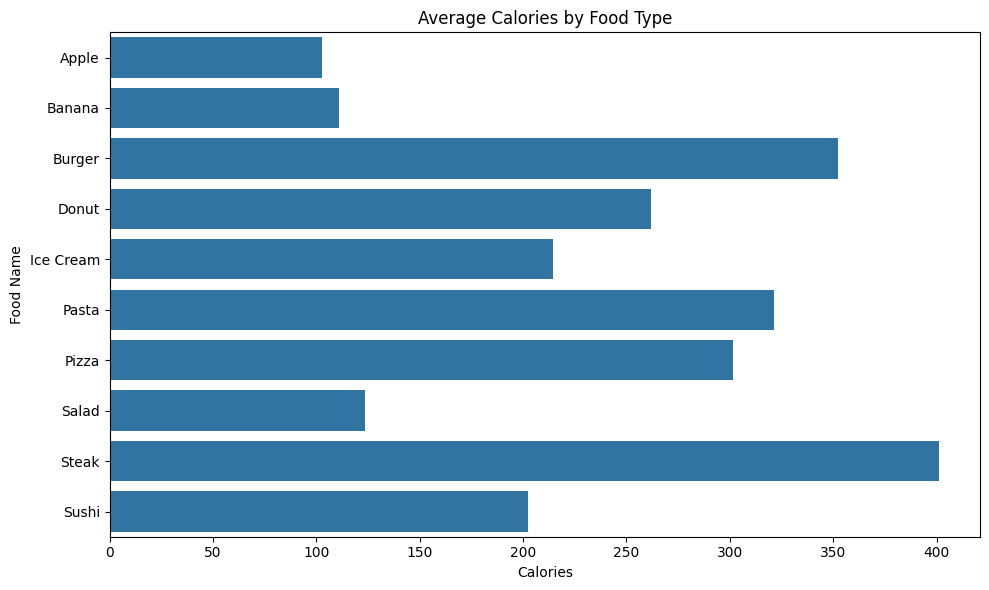

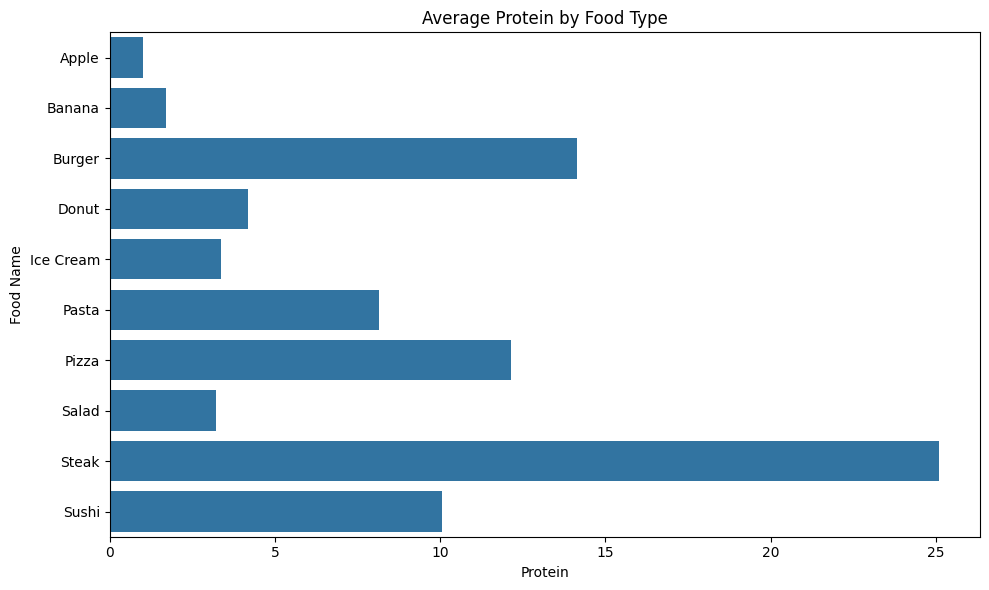

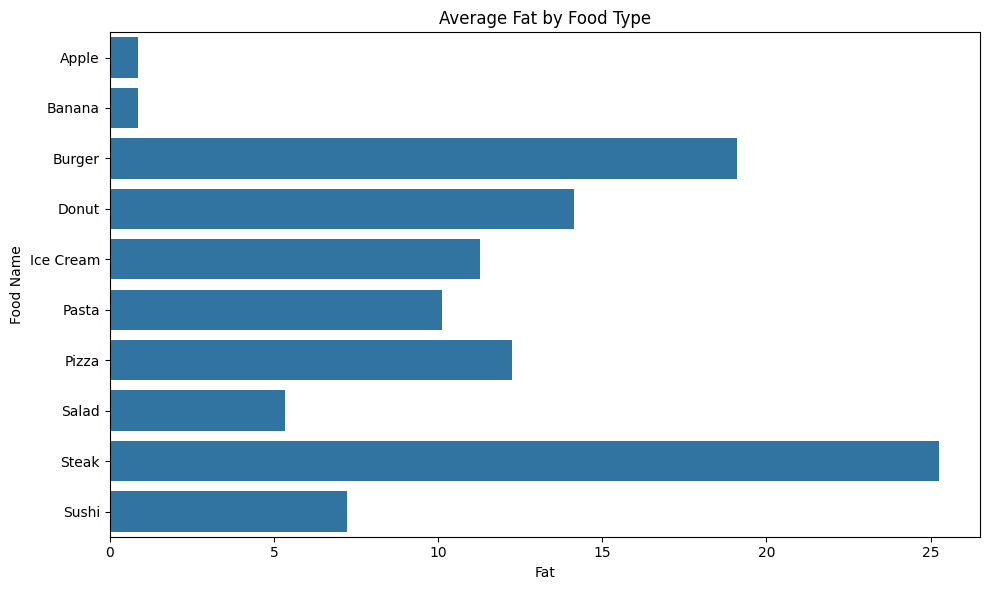

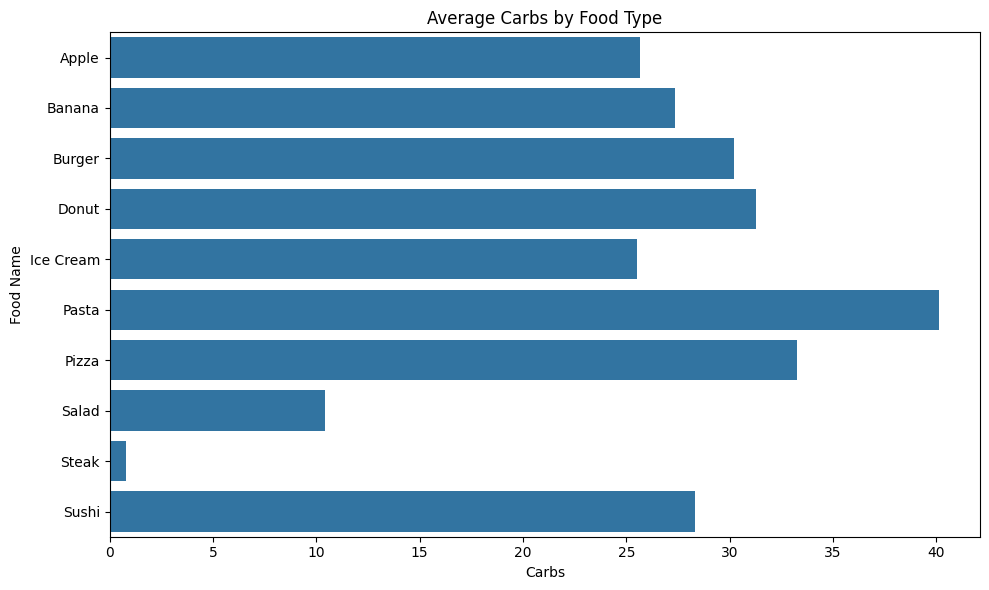

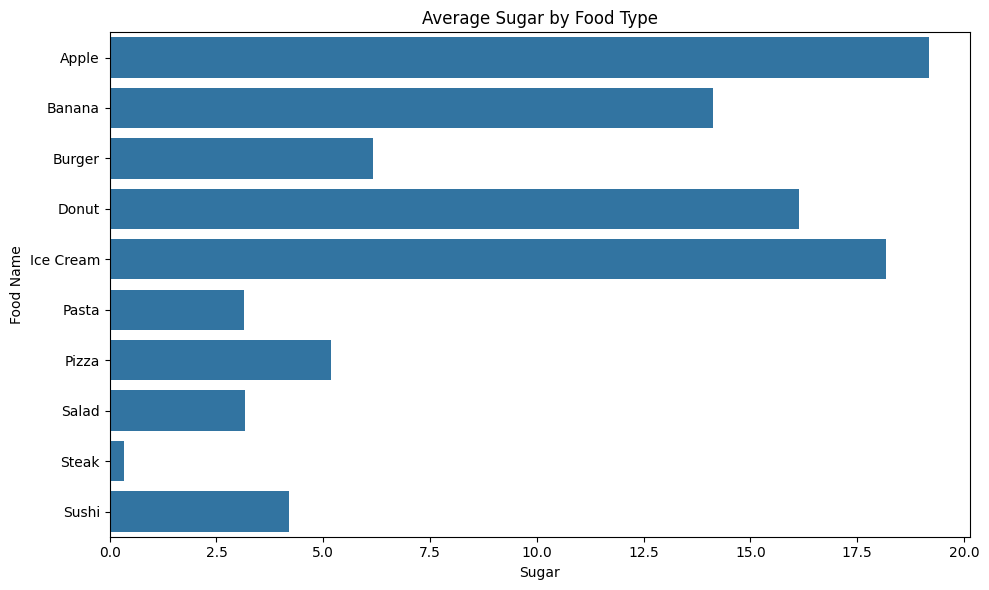

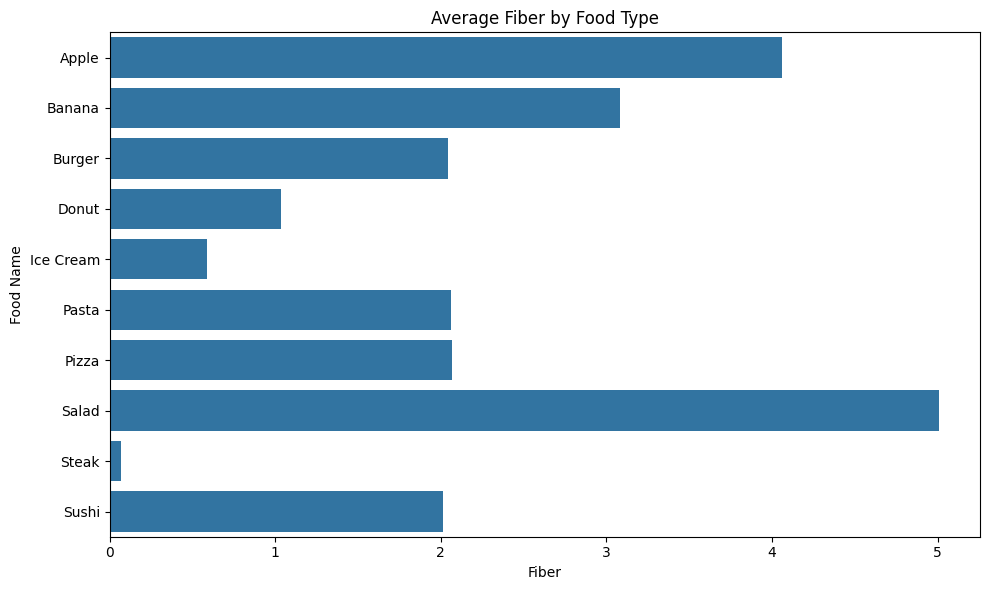

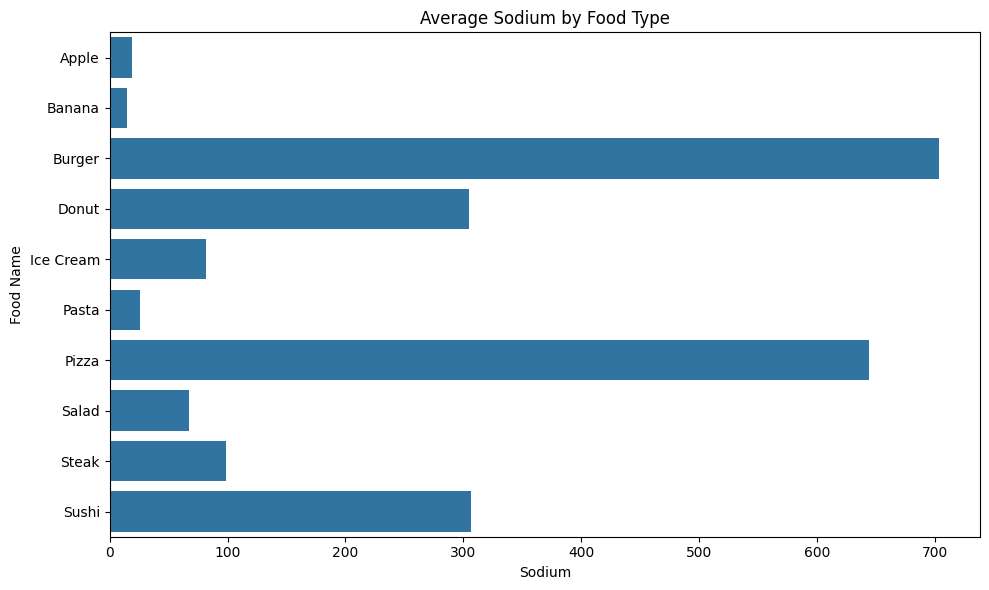

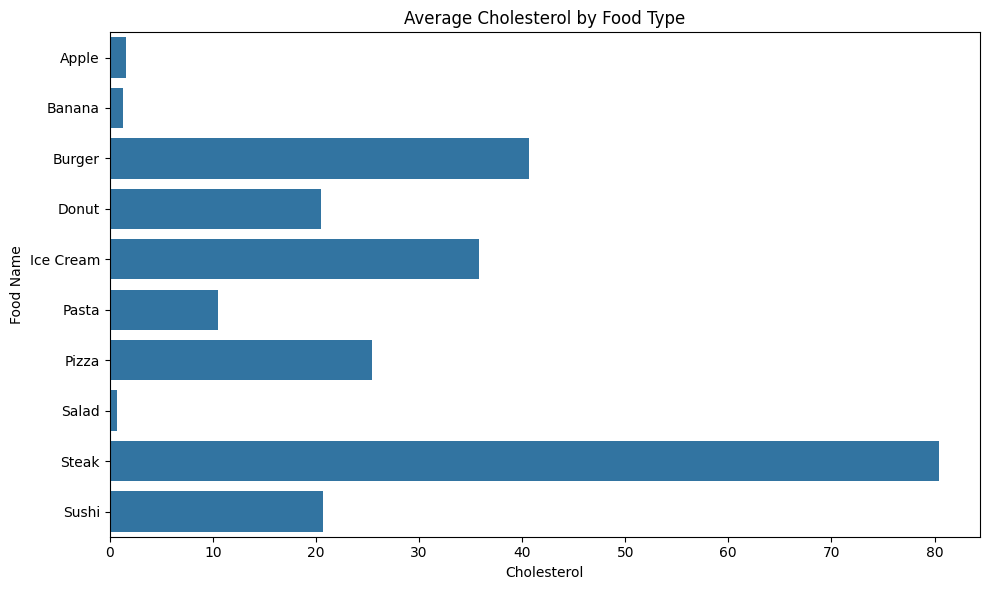

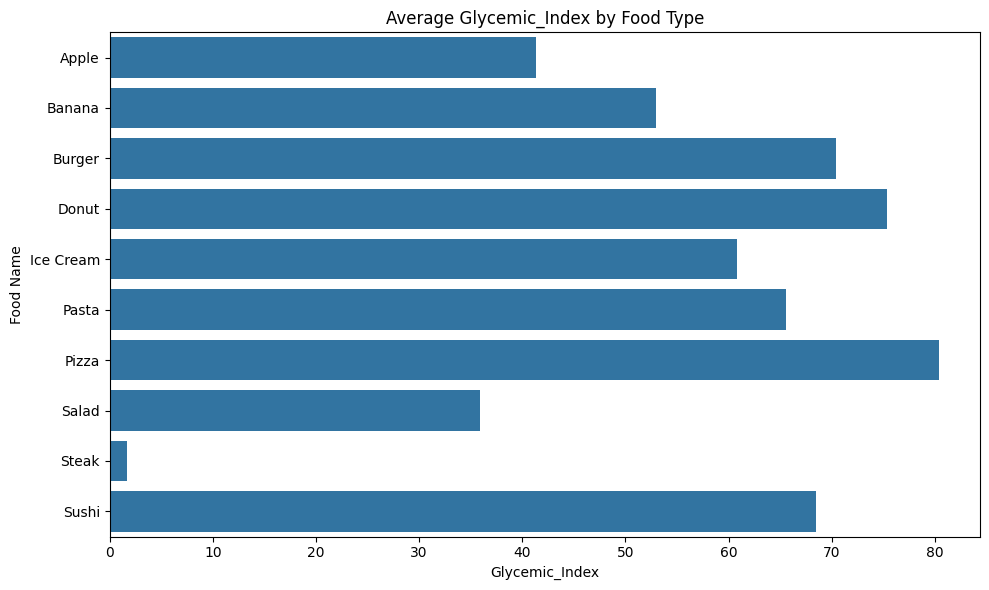

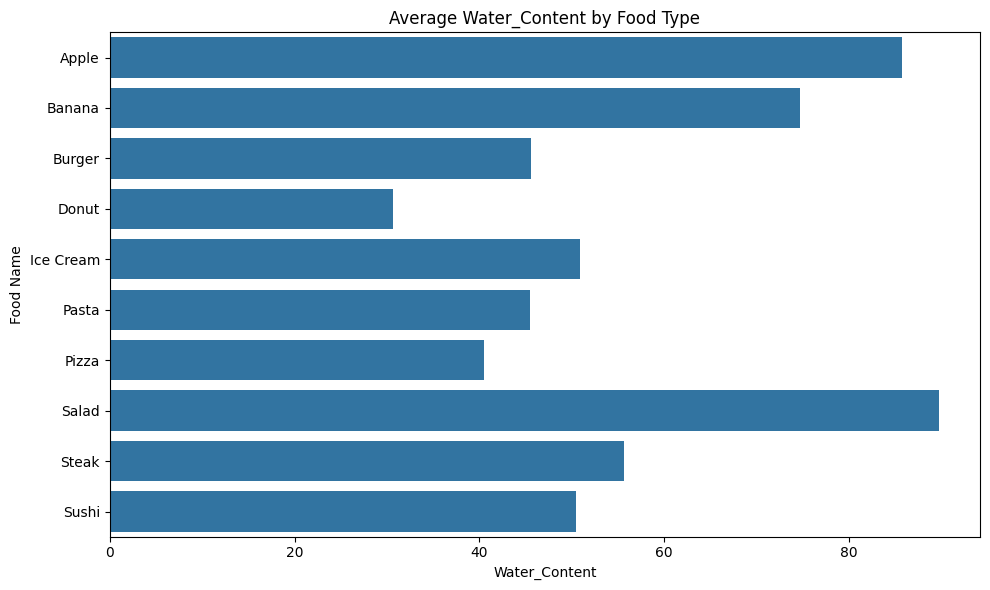

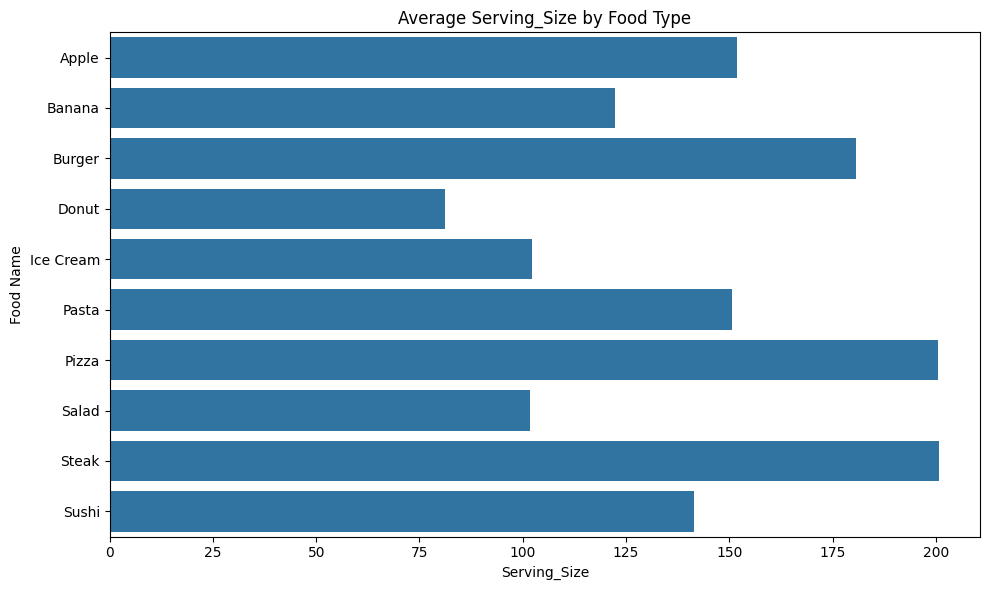

In [55]:
# Numerical columns bar chart with mean values
for col in num_cont_cols:
    plt.figure(figsize=(10, 6))
    
    # Compute mean of that nutrition feature for each food
    food_means = df.groupby('Food_Name')[col].mean().reset_index()
    
    sns.barplot(data=food_means, x=col, y='Food_Name')
    
    plt.title(f"Average {col} by Food Type")
    plt.xlabel(col)
    plt.ylabel("Food Name")
    plt.tight_layout()
    plt.show()

In [56]:
# Hypothesis testing for category columns

def cat_target_cat_features(df, feature_col, target_col):
    ctab = pd.crosstab(df[feature_col], df[target_col])
    print("Cross Tabulation for", feature_col, "and", target_col)
    print(ctab)

    chi2, p, dof, expected = chi2_contingency(ctab)

    alpha = 0.05
    if p <= alpha:
        print(f"Reject Null Hypothesis: There is a significant relationship between the {feature_col} and the {target_col}.")
    else:
        print(f"Accept Null Hypothesis: There is no significant relationship between the {feature_col} and the {target_col}.")

    # count plot
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature_col, hue=target_col)
    plt.title("Count Plot for " + feature_col + " and " + target_col)
    plt.show()
    
    # bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x=feature_col, y=target_col)
    plt.title("Bar Plot for " + feature_col + " and " + target_col)
    plt.show()
    
    


Meal_Type
Cross Tabulation for Meal_Type and Food_Name
Food_Name  Apple  Banana  Burger  Donut  Ice Cream  Pasta  Pizza  Salad  \
Meal_Type                                                                 
breakfast    348     309    1227   1162        725    983   1494    272   
dinner       361     289    1264   1074        759   1001   1504    234   
lunch        378     307    1211   1164        745    958   1383    255   
snack        397     288    1236   1066        739   1033   1535    232   

Food_Name  Steak  Sushi  
Meal_Type                
breakfast    476    878  
dinner       473    840  
lunch        526    864  
snack        517    880  
Accept Null Hypothesis: There is no significant relationship between the Meal_Type and the Food_Name.


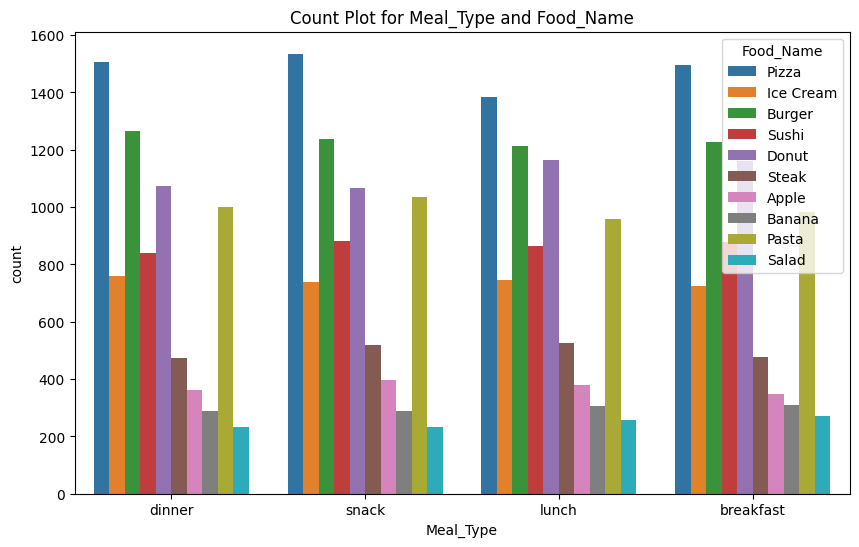

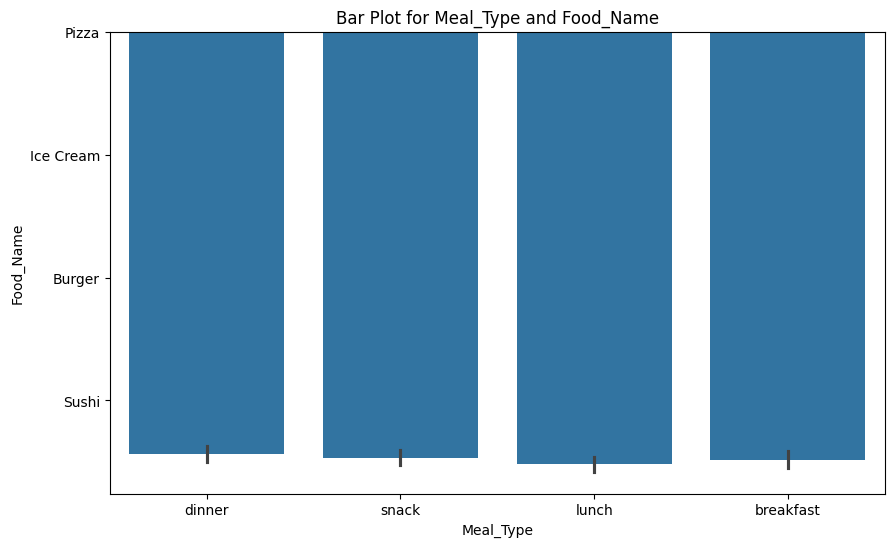

--------------------------------------------------
Preparation_Method
Cross Tabulation for Preparation_Method and Food_Name
Food_Name           Apple  Banana  Burger  Donut  Ice Cream  Pasta  Pizza  \
Preparation_Method                                                          
baked                 383     304    1290   1129        774   1005   1452   
fried                 360     304    1172   1081        718    970   1479   
grilled               409     273    1221   1106        722   1001   1550   
raw                   332     312    1255   1150        754    999   1435   

Food_Name           Salad  Steak  Sushi  
Preparation_Method                       
baked                 254    482    897  
fried                 244    522    831  
grilled               239    498    849  
raw                   256    490    885  
Accept Null Hypothesis: There is no significant relationship between the Preparation_Method and the Food_Name.


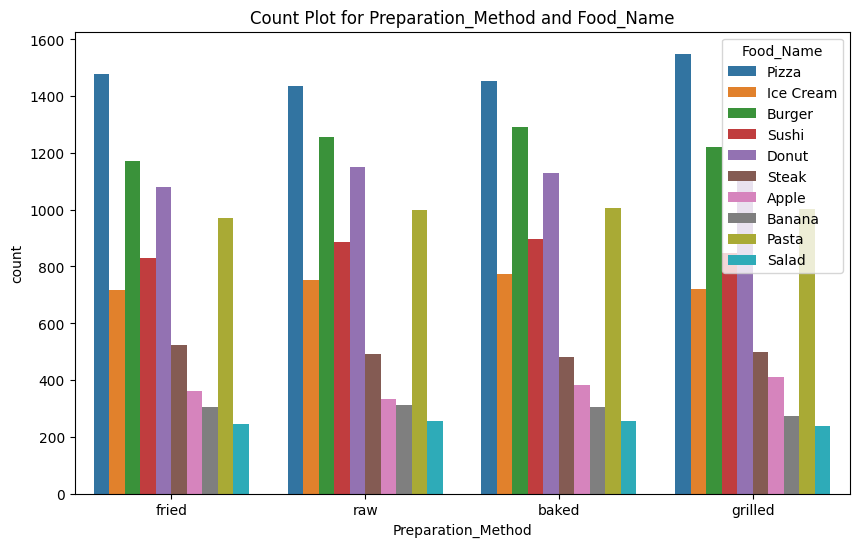

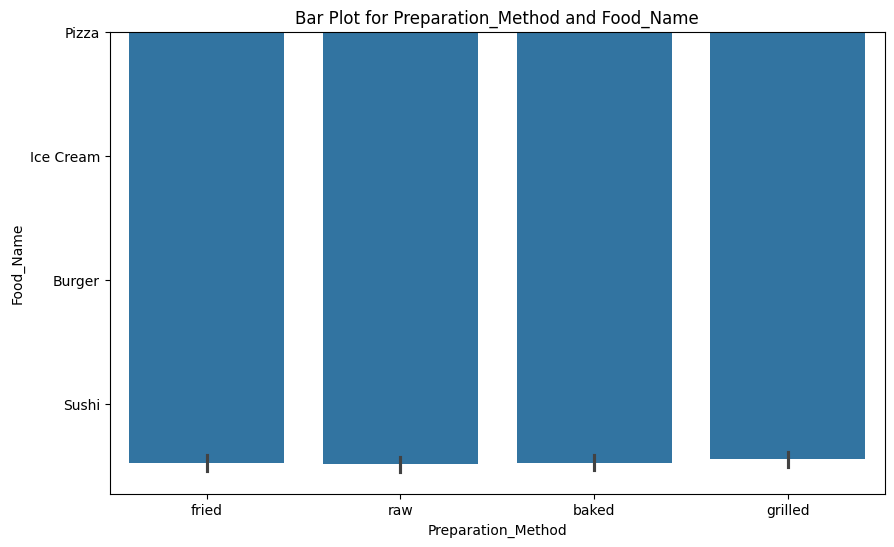

--------------------------------------------------
Is_Vegan
Cross Tabulation for Is_Vegan and Food_Name
Food_Name  Apple  Banana  Burger  Donut  Ice Cream  Pasta  Pizza  Salad  \
Is_Vegan                                                                  
False          0       0    4938   4466       2968   3975   5916      0   
True        1484    1193       0      0          0      0      0    993   

Food_Name  Steak  Sushi  
Is_Vegan                 
False       1992   3462  
True           0      0  
Reject Null Hypothesis: There is a significant relationship between the Is_Vegan and the Food_Name.


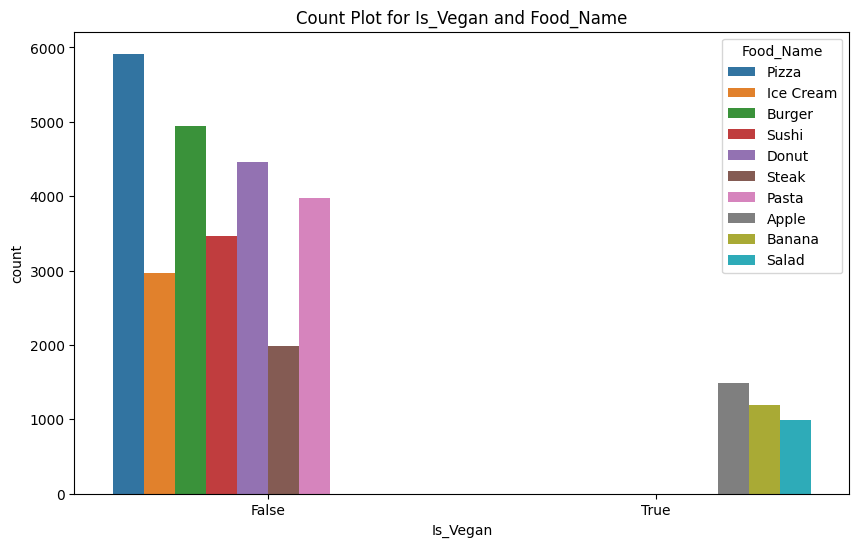

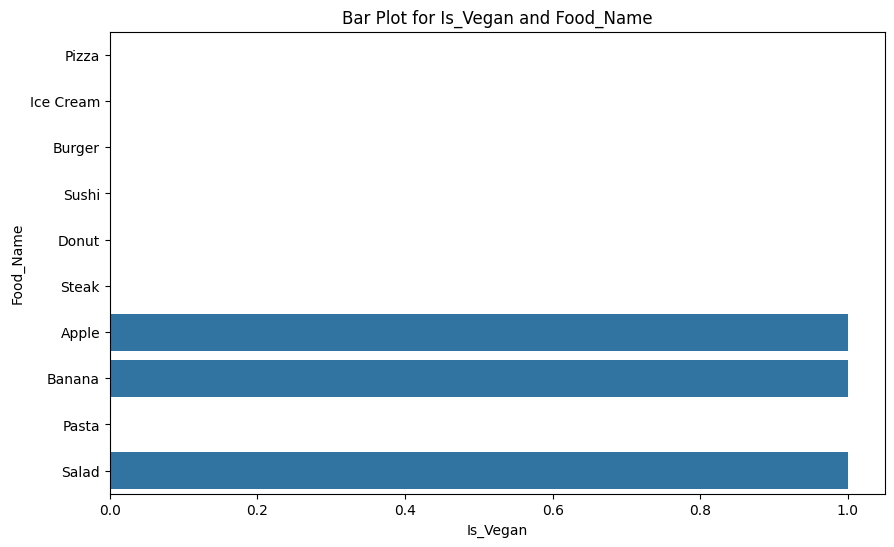

--------------------------------------------------
Is_Gluten_Free
Cross Tabulation for Is_Gluten_Free and Food_Name
Food_Name       Apple  Banana  Burger  Donut  Ice Cream  Pasta  Pizza  Salad  \
Is_Gluten_Free                                                                 
False               0       0    4938   4466          0   3975   5916      0   
True             1484    1193       0      0       2968      0      0    993   

Food_Name       Steak  Sushi  
Is_Gluten_Free                
False               0      0  
True             1992   3462  
Reject Null Hypothesis: There is a significant relationship between the Is_Gluten_Free and the Food_Name.


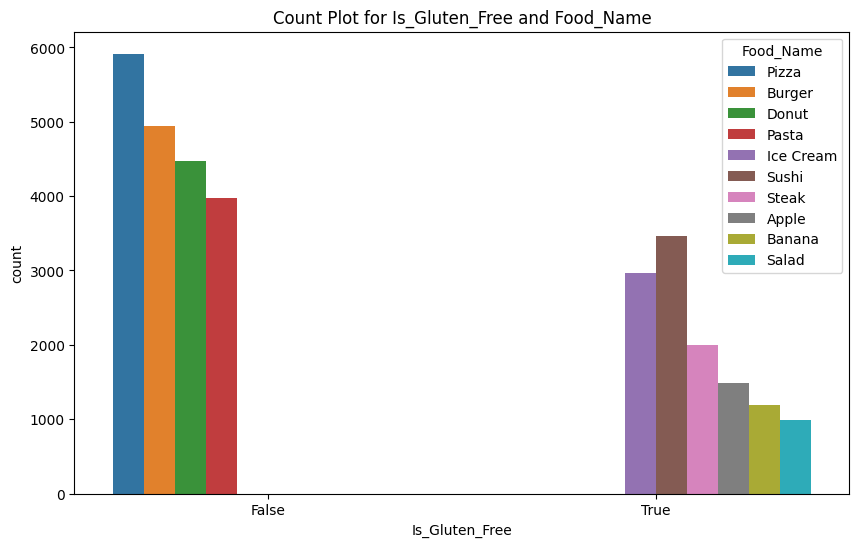

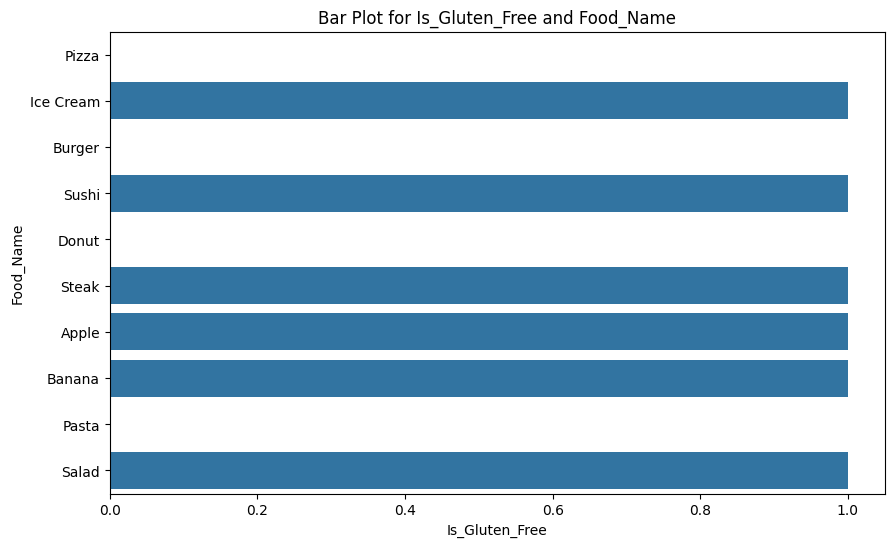

--------------------------------------------------


In [57]:
for col in cat_cols:
    print(col)
    cat_target_cat_features(df, col, 'Food_Name')
    print("-" * 50)

In [58]:
# Hypothesis testing for numeric columns
def num_cont_cat_target(df, feature_col, target_col):

    print("\n--------------------------------------")
    print(f"ANOVA Test for {feature_col} vs {target_col}")
    print("--------------------------------------")

    groups = []

    # Collect all groups first
    for group in df[target_col].unique():
        values = df[df[target_col] == group][feature_col].dropna()

        # ANOVA needs at least 2 values in each group
        if len(values) >= 2:
            groups.append(values)

    # Check if we have at least 2 valid groups
    if len(groups) < 2:
        print("Not enough valid groups for ANOVA")
        return

    # Run ANOVA ONCE
    f_stat, p_val = f_oneway(*groups)

    print("F-statistic:", f_stat)
    print("p-value:", p_val)

    alpha = 0.05
    if p_val <= alpha:
        print(f"Reject Null Hypothesis: {feature_col} is significantly related to {target_col} ")
    else:
        print(f"Accept Null Hypothesis: {feature_col} is NOT related to {target_col} DROP")

    #Visualizations
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=target_col, y=feature_col)
    plt.title(f"{feature_col} vs {target_col}")
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x=feature_col, hue=target_col, fill=True)
    plt.title(f"Distribution of {feature_col} by {target_col}")
    plt.show()



--------------------------------------
ANOVA Test for Calories vs Food_Name
--------------------------------------
F-statistic: 5898.348404648768
p-value: 0.0
Reject Null Hypothesis: Calories is significantly related to Food_Name 


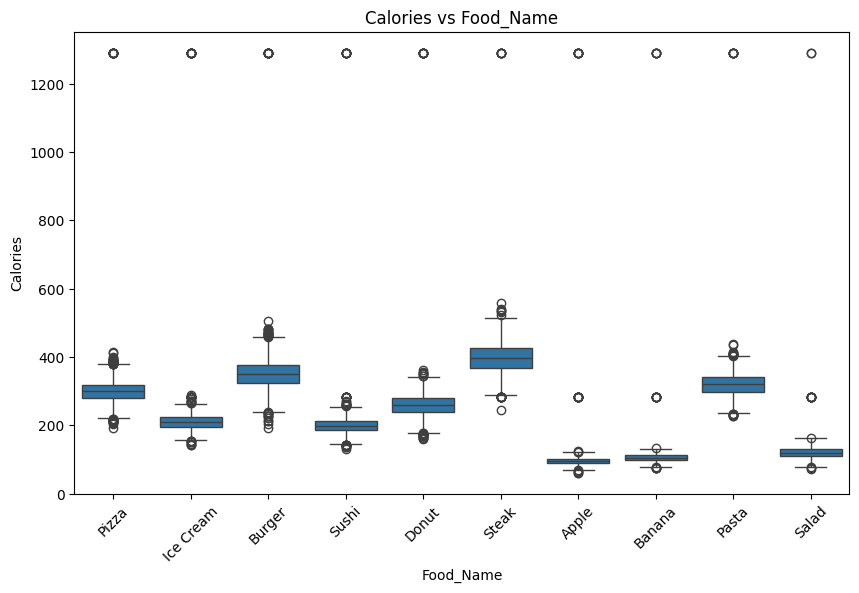

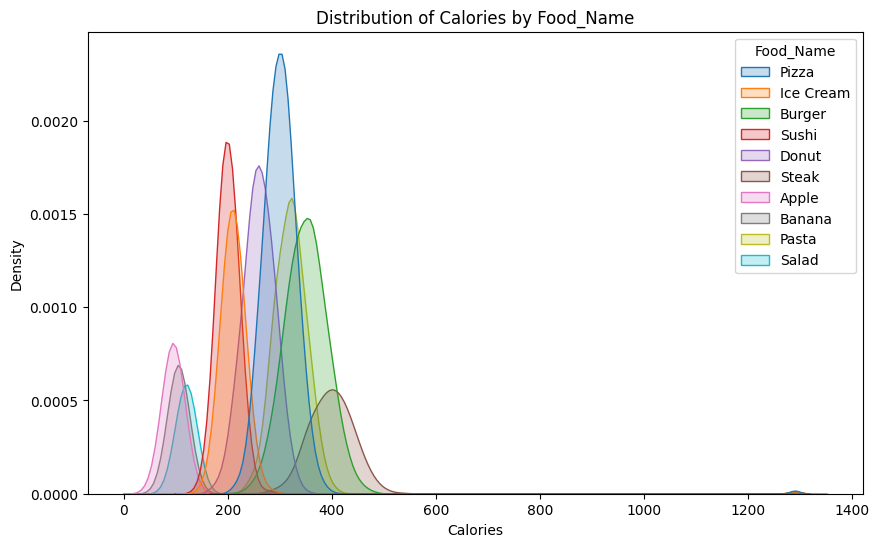

------------------------------------------------------------

--------------------------------------
ANOVA Test for Protein vs Food_Name
--------------------------------------
F-statistic: 6547.3205483026995
p-value: 0.0
Reject Null Hypothesis: Protein is significantly related to Food_Name 


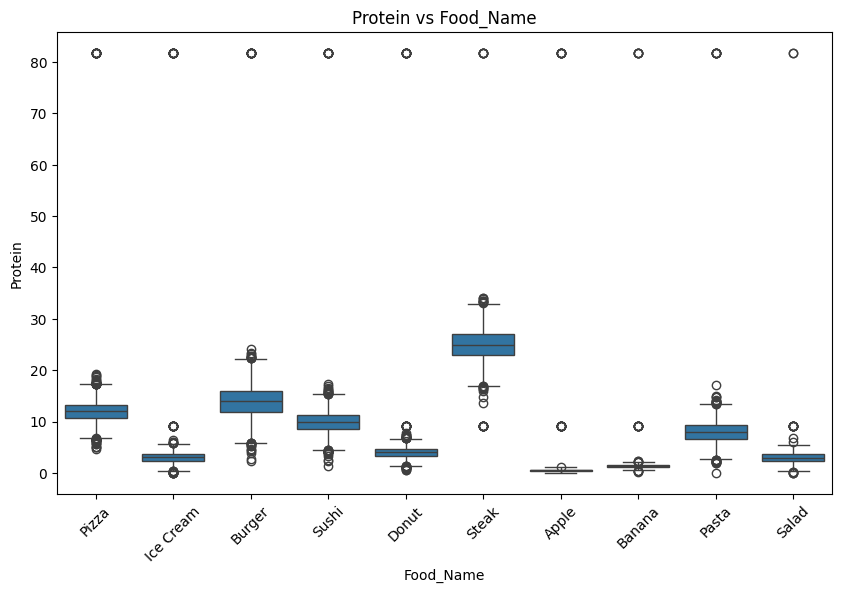

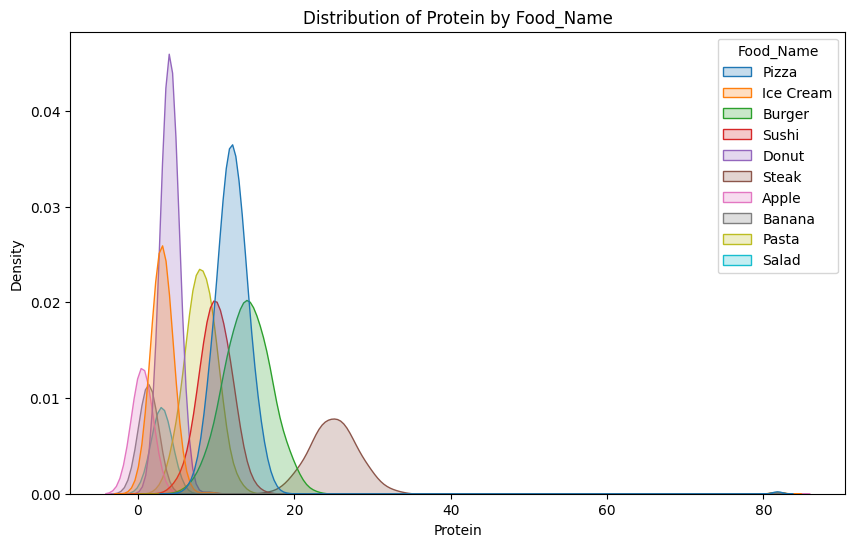

------------------------------------------------------------

--------------------------------------
ANOVA Test for Fat vs Food_Name
--------------------------------------
F-statistic: 4976.87192093338
p-value: 0.0
Reject Null Hypothesis: Fat is significantly related to Food_Name 


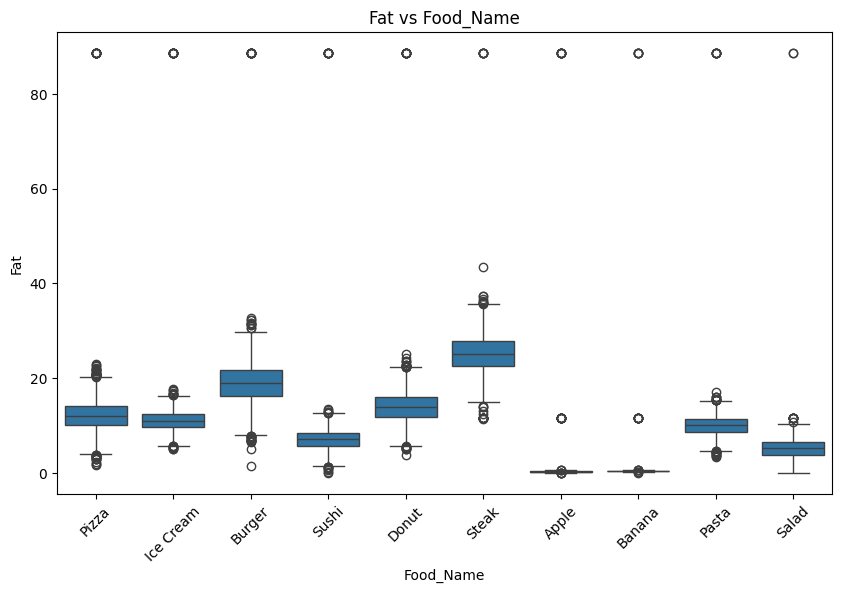

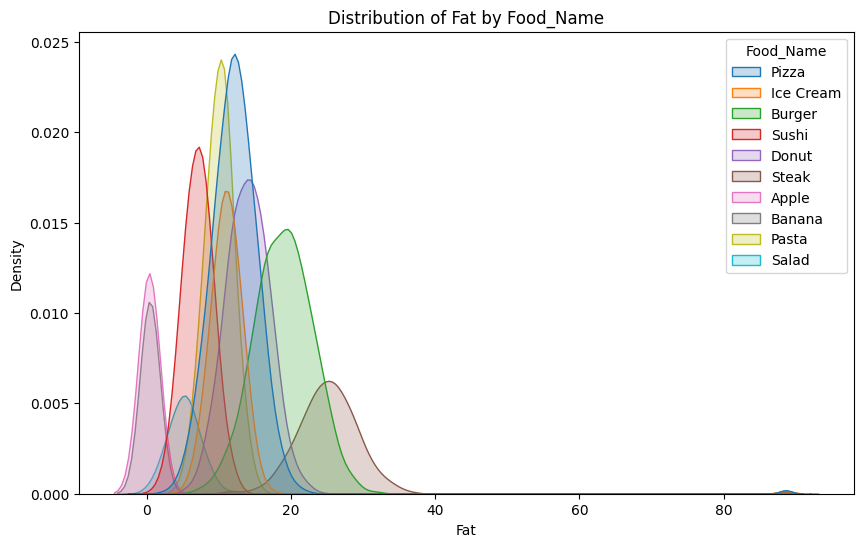

------------------------------------------------------------

--------------------------------------
ANOVA Test for Carbs vs Food_Name
--------------------------------------
F-statistic: 5667.692638352326
p-value: 0.0
Reject Null Hypothesis: Carbs is significantly related to Food_Name 


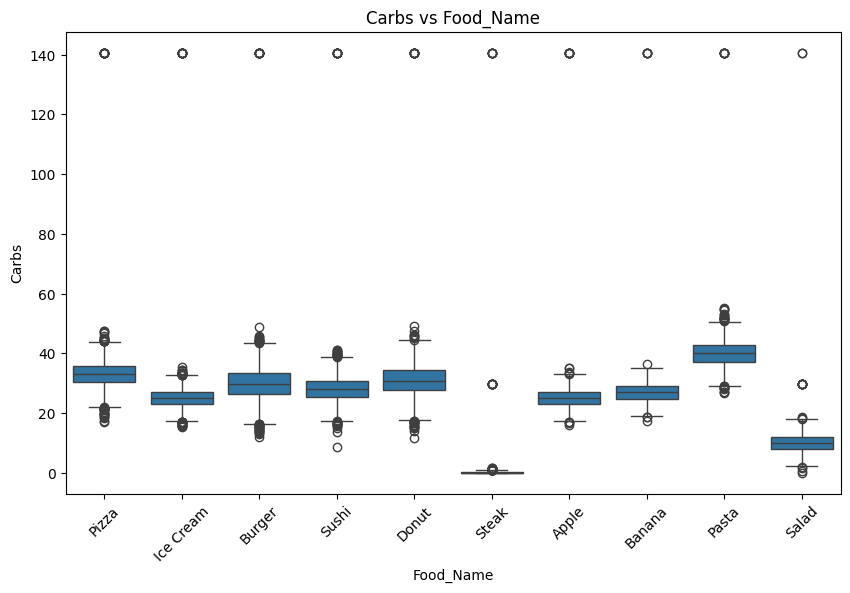

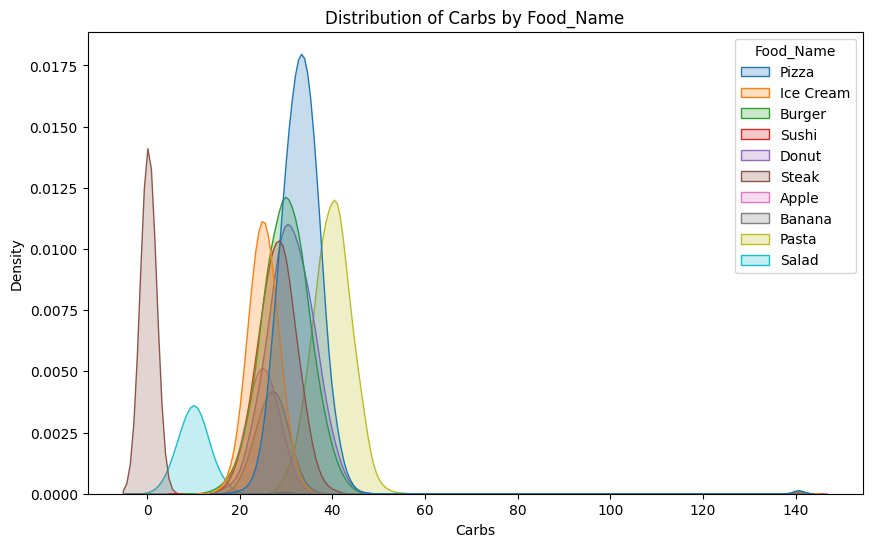

------------------------------------------------------------

--------------------------------------
ANOVA Test for Sugar vs Food_Name
--------------------------------------
F-statistic: 8107.287346824171
p-value: 0.0
Reject Null Hypothesis: Sugar is significantly related to Food_Name 


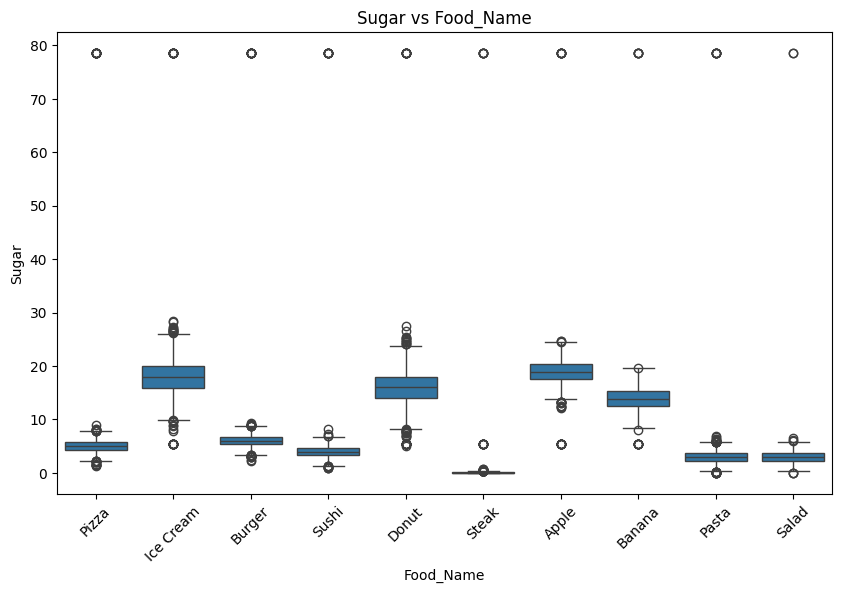

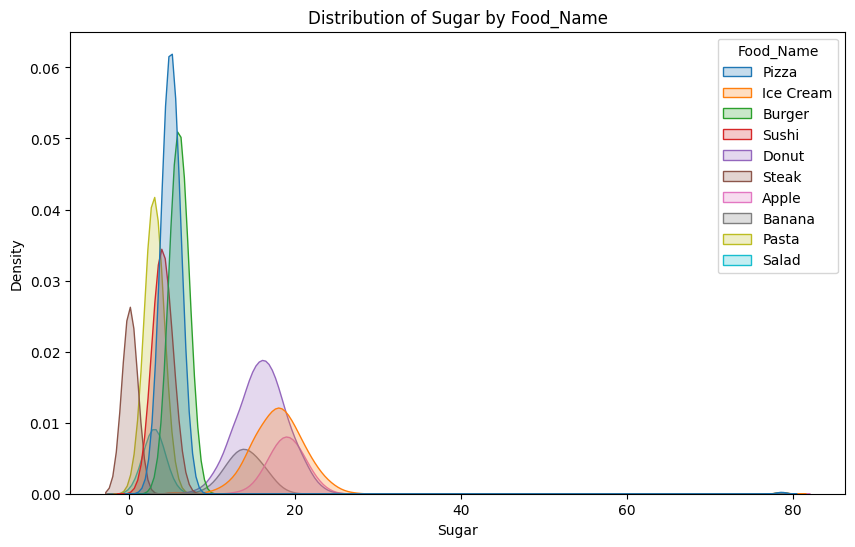

------------------------------------------------------------

--------------------------------------
ANOVA Test for Fiber vs Food_Name
--------------------------------------
F-statistic: 2517.2466513905647
p-value: 0.0
Reject Null Hypothesis: Fiber is significantly related to Food_Name 


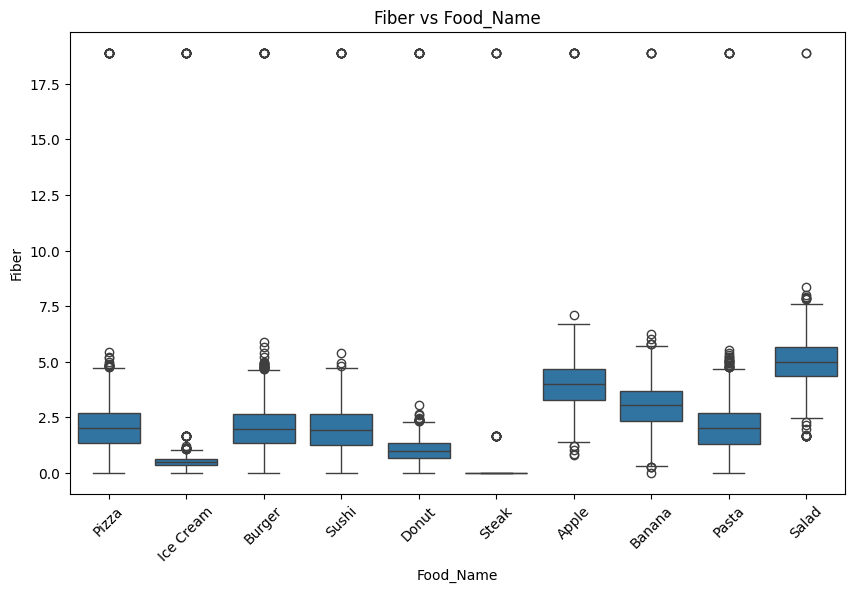

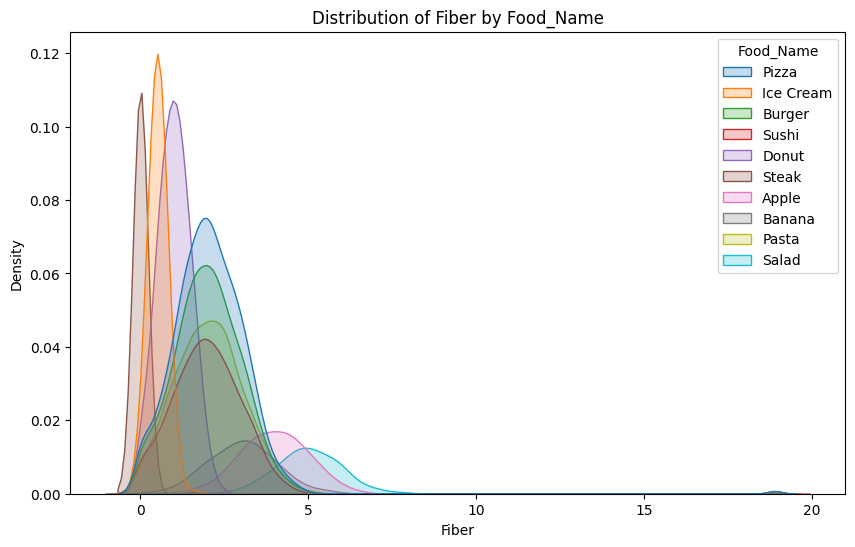

------------------------------------------------------------

--------------------------------------
ANOVA Test for Sodium vs Food_Name
--------------------------------------
F-statistic: 14259.912600752321
p-value: 0.0
Reject Null Hypothesis: Sodium is significantly related to Food_Name 


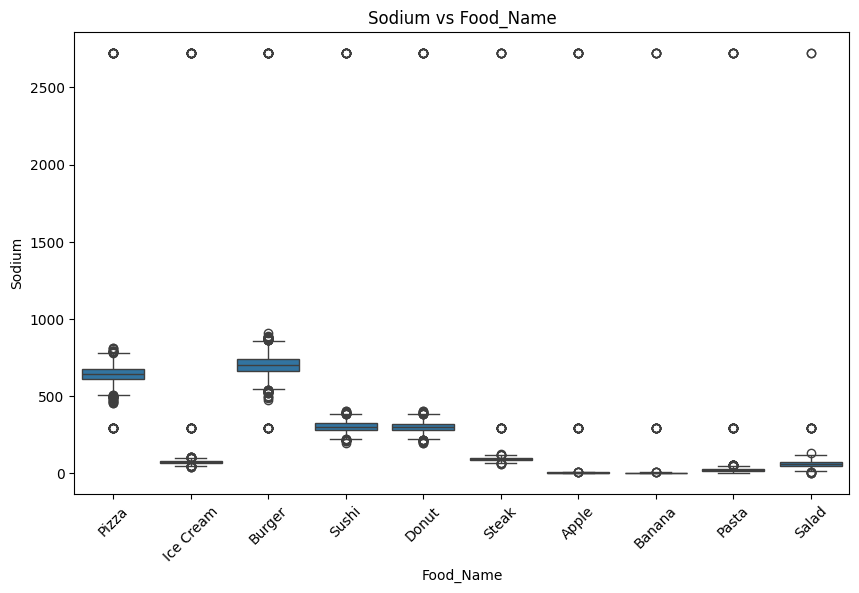

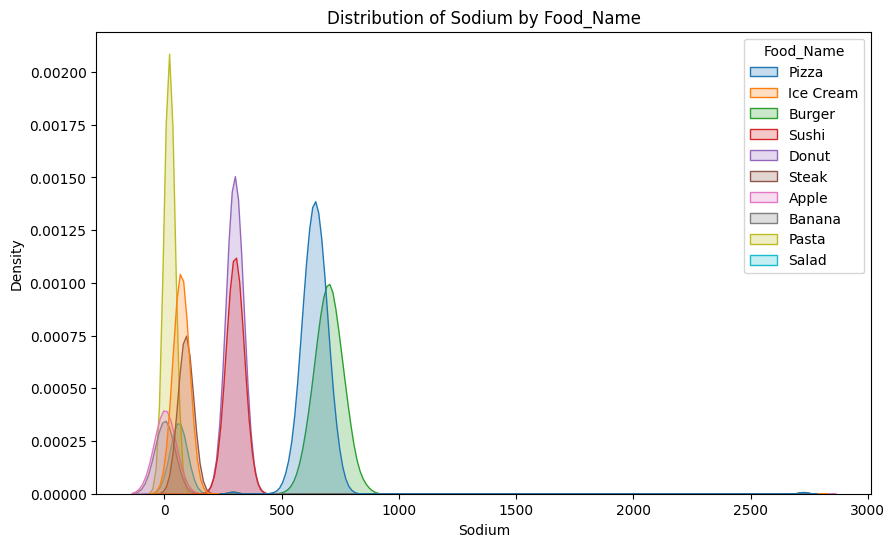

------------------------------------------------------------

--------------------------------------
ANOVA Test for Cholesterol vs Food_Name
--------------------------------------
F-statistic: 6997.326642392709
p-value: 0.0
Reject Null Hypothesis: Cholesterol is significantly related to Food_Name 


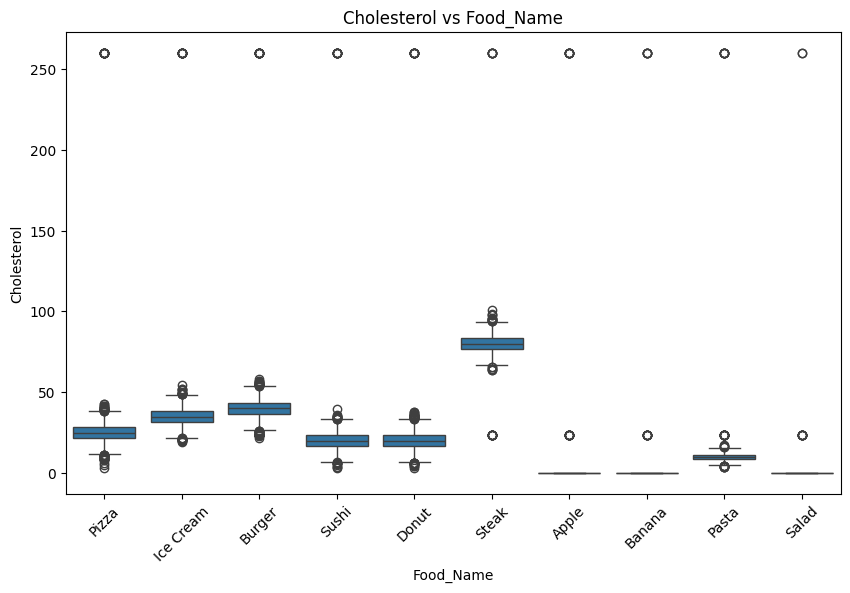

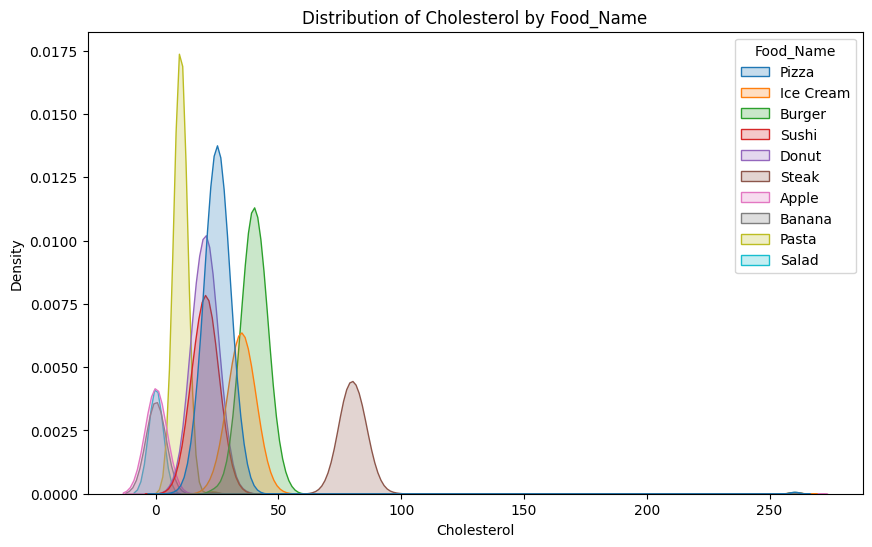

------------------------------------------------------------

--------------------------------------
ANOVA Test for Glycemic_Index vs Food_Name
--------------------------------------
F-statistic: 8184.70965492726
p-value: 0.0
Reject Null Hypothesis: Glycemic_Index is significantly related to Food_Name 


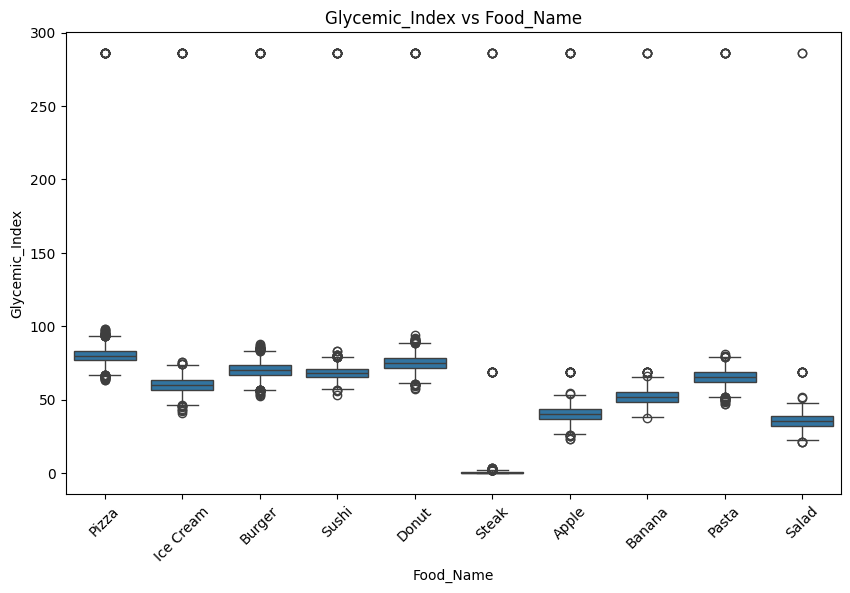

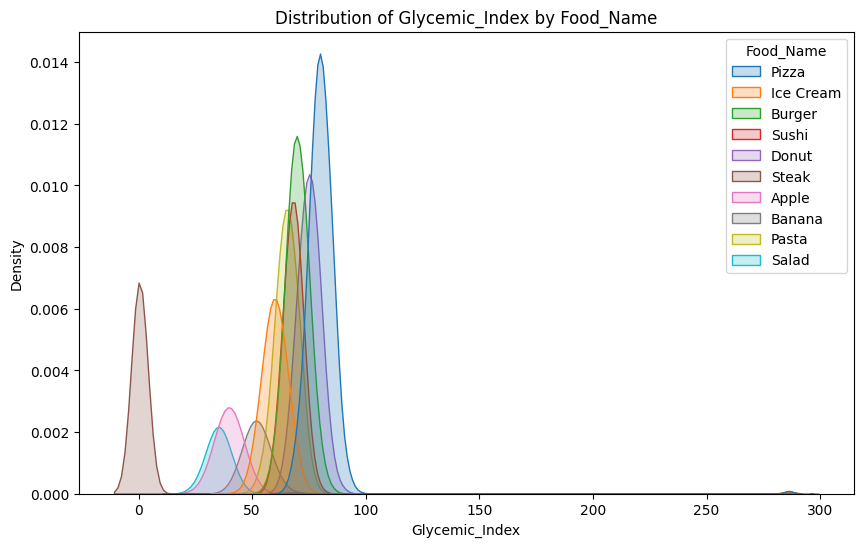

------------------------------------------------------------

--------------------------------------
ANOVA Test for Water_Content vs Food_Name
--------------------------------------
F-statistic: 5419.388043729924
p-value: 0.0
Reject Null Hypothesis: Water_Content is significantly related to Food_Name 


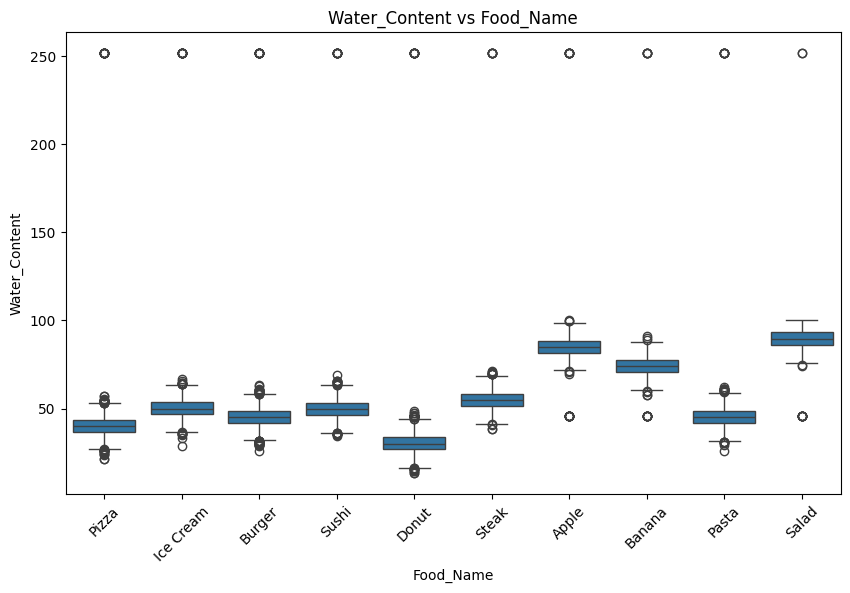

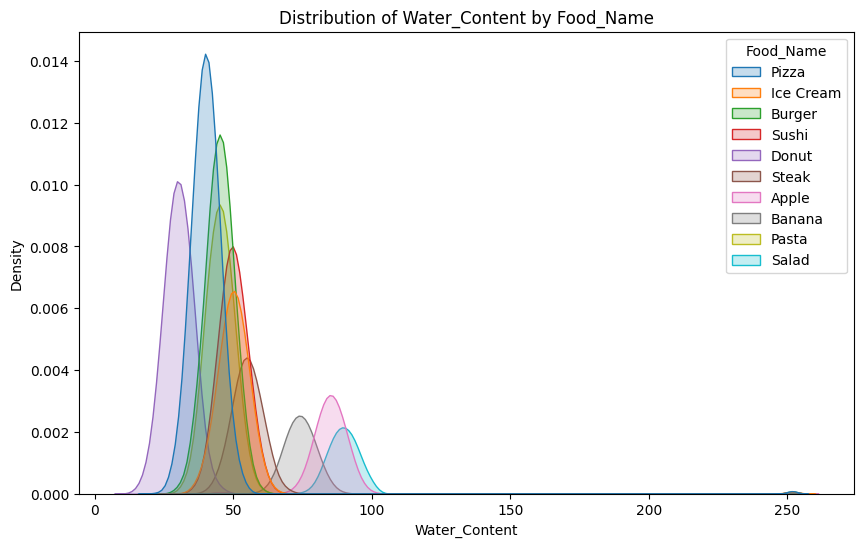

------------------------------------------------------------

--------------------------------------
ANOVA Test for Serving_Size vs Food_Name
--------------------------------------
F-statistic: 11463.720206977465
p-value: 0.0
Reject Null Hypothesis: Serving_Size is significantly related to Food_Name 


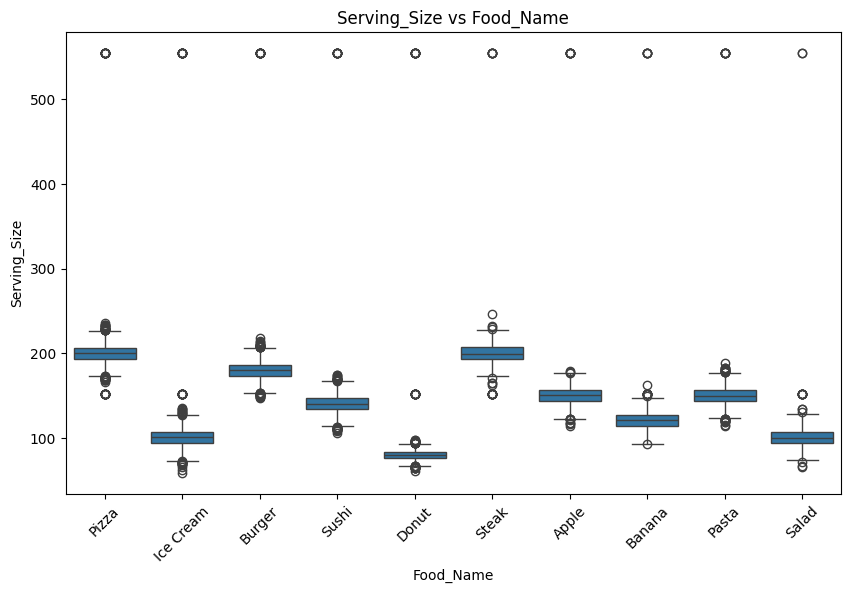

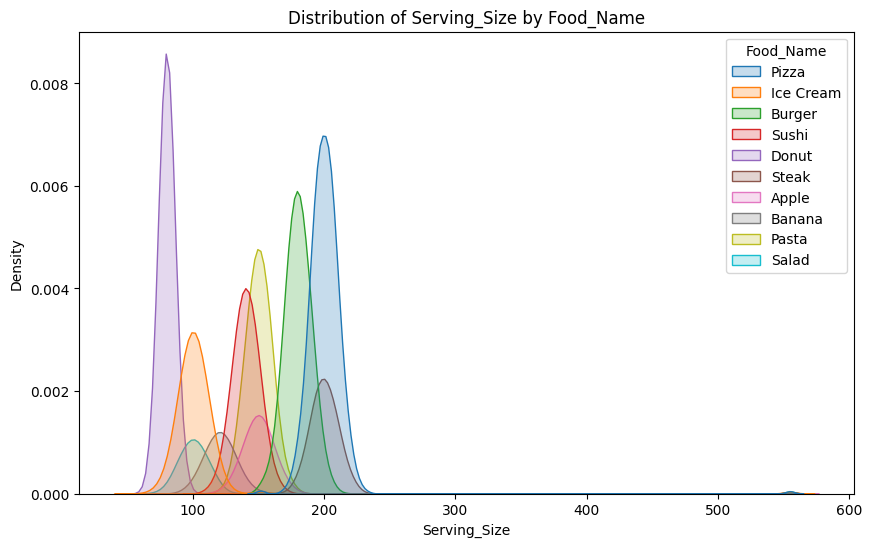

------------------------------------------------------------


In [59]:
for col in num_cont_cols:
    num_cont_cat_target(df, col, 'Food_Name')
    print("-" * 60)

In [60]:
num_cont_selected_features = df[['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium', 'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size']]
cat_selected_features = df[['Is_Vegan', 'Is_Gluten_Free']]

In [61]:
cat_selected_features['Is_Vegan'].value_counts(normalize=True).index

Index([False, True], dtype='bool', name='Is_Vegan')

In [62]:
cat_selected_features['Is_Gluten_Free'].value_counts(normalize=True).index

Index([False, True], dtype='bool', name='Is_Gluten_Free')

In [63]:
cat_column_rank = [[False, True], [False, True]]

In [64]:
bool_to_int = FunctionTransformer(lambda x: x.astype(int))

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
Num_con_Transformers = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

Cat_Transformers = Pipeline(steps=[
    ('Bool_to_Int', bool_to_int),
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

In [67]:
Preprocessing = ColumnTransformer(transformers=[
    ('num_con', Num_con_Transformers, num_cont_selected_features.columns),
    ('cat', Cat_Transformers, cat_selected_features.columns)
])

In [68]:
Preprocessing

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num_con', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_name``. e.

In [69]:
# Logistic Regression
Logistic_Model = Pipeline(steps=[
    ('Preprocessing', Preprocessing),
    ('classifier', LogisticRegression())
])

Logistic_Model.fit(X_train, y_train)

y_pred_train = Logistic_Model.predict(X_train)
y_pred_test = Logistic_Model.predict(X_test)

# Evaluation Metrics
print("Classfication Report for Train Data:")
print(classification_report(y_train, y_pred_train))

print("Classfication Report for Test Data:")
print(classification_report(y_test, y_pred_test))

/home/shigilsasi/miniconda3/envs/learn_ds/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classfication Report for Train Data:
              precision    recall  f1-score   support

       Apple       0.98      0.98      0.98      1173
      Banana       0.97      0.98      0.97       971
      Burger       0.99      0.99      0.99      3969
       Donut       1.00      0.99      1.00      3537
   Ice Cream       0.99      1.00      1.00      2362
       Pasta       0.99      1.00      0.99      3150
       Pizza       0.99      0.99      0.99      4763
       Salad       1.00      0.99      0.99       794
       Steak       1.00      0.99      1.00      1599
       Sushi       0.99      1.00      1.00      2791

    accuracy                           0.99     25109
   macro avg       0.99      0.99      0.99     25109
weighted avg       0.99      0.99      0.99     25109

Classfication Report for Test Data:
              precision    recall  f1-score   support

       Apple       1.00      0.98      0.99       311
      Banana       0.97      1.00      0.98       222
     

In [70]:
# Decision Tree
Decision_Tree_Model = Pipeline(steps=[
    ('Preprocessing', Preprocessing),
    ('classifier', DecisionTreeClassifier(max_depth=9))
])

Decision_Tree_Model.fit(X_train, y_train)

y_pred_train = Decision_Tree_Model.predict(X_train)
y_pred_test = Decision_Tree_Model.predict(X_test)

# Evaluation Metrics
print("Classfication Report for Train Data:")
print(classification_report(y_train, y_pred_train))

print("Classfication Report for Test Data:")
print(classification_report(y_test, y_pred_test))

Classfication Report for Train Data:
              precision    recall  f1-score   support

       Apple       0.97      1.00      0.98      1173
      Banana       1.00      0.98      0.99       971
      Burger       0.99      0.99      0.99      3969
       Donut       1.00      0.99      1.00      3537
   Ice Cream       0.99      1.00      0.99      2362
       Pasta       1.00      0.99      1.00      3150
       Pizza       0.99      0.99      0.99      4763
       Salad       1.00      0.99      0.99       794
       Steak       1.00      0.99      1.00      1599
       Sushi       1.00      0.99      1.00      2791

    accuracy                           0.99     25109
   macro avg       0.99      0.99      0.99     25109
weighted avg       0.99      0.99      0.99     25109

Classfication Report for Test Data:
              precision    recall  f1-score   support

       Apple       0.98      1.00      0.99       311
      Banana       1.00      0.98      0.99       222
     

In [71]:
# Random Forest
Random_Tree_Model = Pipeline(steps=[
    ('Preprocessing', Preprocessing),
    ('classifier', RandomForestClassifier())
])

Random_Tree_Model.fit(X_train, y_train)

y_pred_train = Random_Tree_Model.predict(X_train)
y_pred_test = Random_Tree_Model.predict(X_test)

# Evaluation Metrics
print("Classfication Report for Train Data:")
print(classification_report(y_train, y_pred_train))

print("Classfication Report for Test Data:")
print(classification_report(y_test, y_pred_test))

Classfication Report for Train Data:
              precision    recall  f1-score   support

       Apple       0.98      1.00      0.99      1173
      Banana       1.00      0.99      0.99       971
      Burger       0.99      1.00      0.99      3969
       Donut       1.00      0.99      1.00      3537
   Ice Cream       0.99      1.00      0.99      2362
       Pasta       1.00      0.99      1.00      3150
       Pizza       0.99      1.00      1.00      4763
       Salad       1.00      0.99      0.99       794
       Steak       1.00      0.99      1.00      1599
       Sushi       1.00      0.99      1.00      2791

    accuracy                           1.00     25109
   macro avg       1.00      0.99      1.00     25109
weighted avg       1.00      1.00      1.00     25109

Classfication Report for Test Data:
              precision    recall  f1-score   support

       Apple       0.99      1.00      1.00       311
      Banana       1.00      0.99      1.00       222
     

In [72]:
Pre_Process_pipeline = Pipeline(steps=[ ('Preprocessing', Preprocessing) ]) 
Pre_Process_pipeline

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('Preprocessing', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num_con', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains spar

In [73]:
X_Train_processed = Pre_Process_pipeline.fit_transform(X_train) 
X_Test_processed = Pre_Process_pipeline.transform(X_test)

In [74]:
params = { 
    'n_estimators': [5, 10, 15], 
    'max_depth': [5, 10, 15], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4], 
    'criterion': ['gini', 'entropy'] 
    }

In [75]:
grid_search = GridSearchCV(RandomForestClassifier(), params, cv=3, scoring='accuracy') 
grid_search.fit(X_Train_processed, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestClassifier()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold a

In [76]:
y_pred_train = grid_search.predict(X_Train_processed) 
y_pred_test = grid_search.predict(X_Test_processed) 

# Evaluation Metrics 
print("Classfication Report for Train Data:") 
print(classification_report(y_train, y_pred_train)) 
print("Classfication Report for Test Data:") 
print(classification_report(y_test, y_pred_test))

Classfication Report for Train Data:
              precision    recall  f1-score   support

       Apple       0.98      1.00      0.99      1173
      Banana       1.00      0.99      0.99       971
      Burger       0.99      1.00      0.99      3969
       Donut       1.00      0.99      1.00      3537
   Ice Cream       0.99      1.00      0.99      2362
       Pasta       1.00      0.99      1.00      3150
       Pizza       0.99      1.00      1.00      4763
       Salad       1.00      0.99      0.99       794
       Steak       1.00      0.99      1.00      1599
       Sushi       1.00      0.99      1.00      2791

    accuracy                           1.00     25109
   macro avg       1.00      0.99      0.99     25109
weighted avg       1.00      1.00      1.00     25109

Classfication Report for Test Data:
              precision    recall  f1-score   support

       Apple       0.99      1.00      1.00       311
      Banana       1.00      0.99      1.00       222
     

In [77]:
# Using GridSearchCV in Random Forest 
Random_Tree_Model = Pipeline(steps=[ (
    'Preprocessing', Preprocessing), 
    ('classifier', RandomForestClassifier(**grid_search.best_params_)) ]) 

Random_Tree_Model.fit(X_train, y_train) 
y_pred_train = Random_Tree_Model.predict(X_train) 
y_pred_test = Random_Tree_Model.predict(X_test) 

# Evaluation Metrics 
print("Classfication Report for Train Data:") 
print(classification_report(y_train, y_pred_train)) 
print("Classfication Report for Test Data:") 
print(classification_report(y_test, y_pred_test))

Classfication Report for Train Data:
              precision    recall  f1-score   support

       Apple       0.99      0.99      0.99      1173
      Banana       1.00      0.99      0.99       971
      Burger       0.99      1.00      0.99      3969
       Donut       1.00      0.99      1.00      3537
   Ice Cream       0.99      1.00      1.00      2362
       Pasta       1.00      0.99      1.00      3150
       Pizza       0.99      1.00      1.00      4763
       Salad       0.98      1.00      0.99       794
       Steak       1.00      0.99      1.00      1599
       Sushi       0.99      1.00      1.00      2791

    accuracy                           1.00     25109
   macro avg       0.99      0.99      0.99     25109
weighted avg       1.00      1.00      1.00     25109

Classfication Report for Test Data:
              precision    recall  f1-score   support

       Apple       1.00      0.99      0.99       311
      Banana       1.00      0.99      1.00       222
     

In [78]:
# SVC
SVC_Model = Pipeline(steps=[
    ('Preprocessing', Preprocessing),
    ('classifier', SVC())
])

SVC_Model.fit(X_train, y_train)

y_pred_train = SVC_Model.predict(X_train)
y_pred_test = SVC_Model.predict(X_test)

# Evaluation Metrics
print("Classfication Report for Train Data:")
print(classification_report(y_train, y_pred_train))

print("Classfication Report for Test Data:")
print(classification_report(y_test, y_pred_test))

Classfication Report for Train Data:
              precision    recall  f1-score   support

       Apple       0.98      1.00      0.99      1173
      Banana       1.00      0.98      0.99       971
      Burger       1.00      0.99      0.99      3969
       Donut       1.00      0.99      1.00      3537
   Ice Cream       0.99      1.00      1.00      2362
       Pasta       0.99      1.00      0.99      3150
       Pizza       0.99      0.99      0.99      4763
       Salad       1.00      0.99      0.99       794
       Steak       1.00      0.99      1.00      1599
       Sushi       0.99      1.00      1.00      2791

    accuracy                           0.99     25109
   macro avg       0.99      0.99      0.99     25109
weighted avg       0.99      0.99      0.99     25109

Classfication Report for Test Data:
              precision    recall  f1-score   support

       Apple       0.99      1.00      0.99       311
      Banana       1.00      0.99      0.99       222
     

In [79]:
# K-nearest neighbors
Knn_Model = Pipeline(steps=[
    ('Preprocessing', Preprocessing),
    ('classifier', KNeighborsClassifier())
])

Knn_Model.fit(X_train, y_train)

y_pred_train = Knn_Model.predict(X_train)
y_pred_test = Knn_Model.predict(X_test)

# Evaluation Metrics
print("Classfication Report for Train Data:")
print(classification_report(y_train, y_pred_train))

print("Classfication Report for Test Data:")
print(classification_report(y_test, y_pred_test))

Classfication Report for Train Data:
              precision    recall  f1-score   support

       Apple       0.99      0.99      0.99      1173
      Banana       0.99      0.99      0.99       971
      Burger       0.98      0.99      0.99      3969
       Donut       1.00      0.99      1.00      3537
   Ice Cream       0.99      1.00      0.99      2362
       Pasta       1.00      0.99      1.00      3150
       Pizza       0.99      0.99      0.99      4763
       Salad       1.00      0.99      0.99       794
       Steak       1.00      0.99      1.00      1599
       Sushi       1.00      0.99      1.00      2791

    accuracy                           0.99     25109
   macro avg       0.99      0.99      0.99     25109
weighted avg       0.99      0.99      0.99     25109

Classfication Report for Test Data:
              precision    recall  f1-score   support

       Apple       0.99      0.99      0.99       311
      Banana       0.99      0.99      0.99       222
     

In [80]:
# Gradient Boosting
Model = Pipeline(steps=[
    ('Preprocessing', Preprocessing),
    ('classifier', GradientBoostingClassifier())
])

Model.fit(X_train, y_train)

y_pred_train = Model.predict(X_train)
y_pred_test = Model.predict(X_test)

# Evaluation Metrics
print("Classfication Report for Train Data:")
print(classification_report(y_train, y_pred_train))

print("Classfication Report for Test Data:")
print(classification_report(y_test, y_pred_test))

Classfication Report for Train Data:
              precision    recall  f1-score   support

       Apple       0.98      1.00      0.99      1173
      Banana       1.00      0.99      0.99       971
      Burger       1.00      0.99      1.00      3969
       Donut       1.00      0.99      1.00      3537
   Ice Cream       0.99      1.00      1.00      2362
       Pasta       0.99      1.00      0.99      3150
       Pizza       0.99      1.00      1.00      4763
       Salad       1.00      0.99      0.99       794
       Steak       1.00      0.99      1.00      1599
       Sushi       0.99      1.00      1.00      2791

    accuracy                           1.00     25109
   macro avg       1.00      0.99      0.99     25109
weighted avg       1.00      1.00      1.00     25109

Classfication Report for Test Data:
              precision    recall  f1-score   support

       Apple       0.99      1.00      1.00       311
      Banana       1.00      0.99      1.00       222
     

In [81]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X = df.drop('Food_Name', axis=1)
y = le.fit_transform(df['Food_Name'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
Xgboost_model = Pipeline(steps=[
    ('Preprocessing', Preprocessing),
    ('classifier', XGBClassifier())
])

Xgboost_model.fit(X_train, y_train)

y_pred_train = Xgboost_model.predict(X_train)
y_pred_test = Xgboost_model.predict(X_test)

y_pred_train_labels = le.inverse_transform(y_pred_train)
y_pred_test_labels = le.inverse_transform(y_pred_test)

y_train_labels = le.inverse_transform(y_train)
y_test_labels = le.inverse_transform(y_test)

# Evaluation Metrics
print("Classfication Report for Train Data:")
print(classification_report(y_train_labels, y_pred_train_labels))

print("Classfication Report for Test Data:")
print(classification_report(y_test_labels, y_pred_test_labels))

Classfication Report for Train Data:
              precision    recall  f1-score   support

       Apple       0.98      1.00      0.99      1173
      Banana       1.00      0.99      0.99       971
      Burger       1.00      0.99      1.00      3969
       Donut       1.00      0.99      1.00      3537
   Ice Cream       0.99      1.00      1.00      2362
       Pasta       0.99      1.00      0.99      3150
       Pizza       0.99      1.00      1.00      4763
       Salad       1.00      0.99      0.99       794
       Steak       1.00      0.99      1.00      1599
       Sushi       0.99      1.00      1.00      2791

    accuracy                           1.00     25109
   macro avg       1.00      0.99      0.99     25109
weighted avg       1.00      1.00      1.00     25109

Classfication Report for Test Data:
              precision    recall  f1-score   support

       Apple       0.99      1.00      1.00       311
      Banana       1.00      0.99      1.00       222
     